In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from my_micrograd import Value, Neuron, Layer, MLP
%matplotlib inline

In [2]:
def f(x): 
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

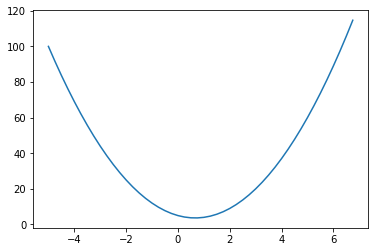

In [4]:
xs = np.arange(-5, 7, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
h = 0.0001
x = 2/3 
(f(x + h) - f(x))/h

0.0002999999981767587

In [6]:
# 
a =  2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [7]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c - 10.0

d1 = a*b + c
c += h 
d2 = a*b + c

print(f'd1 {d1}')
print(f'd2 {d2}')
print(f'slope, {(d2 - d1)/h}')

d1 4.0
d2 4.0001
slope, 0.9999999999976694


In [1]:
# class Value:

#     def __init__(self, data, _children=(), _op='', label='') -> None:
#         self.data = data
#         self.grad = 0.0
#         self._backward = lambda: None
#         self._prev = set(_children)
#         self._op = _op
#         self.label = label

#     def __repr__(self):
#         return f"Value(data={self.data} {self.label})"
    
#     def __add__(self, other):
#         other = other if isinstance(other, Value) else Value(other)
#         out = Value(self.data + other.data, (self, other), '+')

#         def _backward():
#             self.grad += 1.0 * out.grad
#             other.grad += 1.0 * out.grad
#         out._backward = _backward

#         return out
    
#     def __radd__(self, other):
#         return self + other
    
#     def __neg__(self):
#         return self * -1
    
#     def __sub__(self, other):
#         return self + (-other)
    
#     def __rsub__(self, other):
#         return other + (-self)

#     def __mul__(self, other):
#         other = other if isinstance(other, Value) else Value(other)
#         out = Value(self.data * other.data, (self, other), '*')

#         def _backward():
#             self.grad += other.data * out.grad
#             other.grad += self.data * out.grad
#         out._backward = _backward
    
#         return out
    
#     def __rmul__(self, other):
#         return other * self
    
#     def __truediv__(self, other):
#         return self * other ** -1
    
#     def __rtruediv__(self, other):
#         return other * self ** -1
    
#     def __pow__(self, other):
#         assert isinstance(other, (int, float))
#         out = Value(self.data**other, (self, ), f'**{other}')
        
#         def _backward():
#             self.grad += other * self.data ** (other - 1)
#         out._backward = _backward

#         return out

#     def exp(self):
#         x = self.data
#         out = Value(math.exp(x), (self, ), 'exp')

#         def _backward():
#             self.grad += out.data * out.grad
#         out._backward = _backward

#         return out

#     def tanh(self):
#         n = self.data
#         t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
#         out = Value(t, (self, ), 'tanh')

#         def _backward():
#             self.grad += (1- t**2 ) * out.grad
#         out._backward = _backward
        
#         return out

#     def backward(self):

#         topo = []
#         visited = set()
#         def build_topo(v):
#             if v not in visited:
#                 visited.add(v)
#                 for child in v._prev:
#                     build_topo(child)
#                 topo.append(v)
#         build_topo(self)

#         self.grad = 1.0
#         for node in reversed(topo):
#             node._backward()

In [9]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# tanh 
#------
e = (2*n).exp()
o = (e - 1) / (e + 1)
#------
o.label = 'o'
o.backward()
o

Value(data=0.7071067811865477 o)

In [10]:
a = Value(2.0)
b = Value(1.0)

3 - a

Value(data=1.0 )

In [11]:
import torch

x1 = torch.Tensor([2.0]).double()               ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()               ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()              ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()               ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()


print("-------")
print('x1', x1.grad.item())
print('w1', w1.grad.item())
print('x2', x2.grad.item())
print('w2', w2.grad.item())

c:\Python\Python3.10.5\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.7071066904050358
-------
x1 -1.5000003851533106
w1 1.0000002567688737
x2 0.5000001283844369
w2 0.0


In [12]:
# import random
# class Neuron:

#     def __init__(self, nin):
#         self.w = [(Value(random.uniform(-1, 1))) for _ in range(nin)]
#         self.b = Value(random.uniform(-1, 1))

#     def parameters(self):
#         return self.w + [self.b]

#     def __call__(self, x):
#         # w*x + b
#         act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
#         out = act.tanh()
#         return out

# class Layer:

#     def __init__(self, nin, nout):
#         self.neurons = [Neuron(nin) for _ in range(nout)]

#     def __call__(self, x):
#         outs = [n(x) for n in self.neurons]
#         return outs[0] if len(outs) == 1 else outs

#     def parameters(self):
#         return [p for neuron in self.neurons for p in neuron.parameters()]

# class MLP:

#     def __init__(self, nin, nouts):
#         sz = [nin] + nouts
#         self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

#     def __call__(self, x):
#         for layer in self.layers:
#             x = layer(x)
#         return x

#     def parameters(self):
#         return [p for layer in self.layers for p in layer.parameters()]


In [13]:
xs = [
    [5.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]

In [14]:
n = MLP(3, [4, 4, 1])

In [15]:
ypred = [n(x)for x in xs]
ypred
# ygt is y ground truth
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
print(loss)
loss.backward()

Value(data=7.269997547251145 )


In [50]:
for k in range(20):

    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])

    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    # update 
    for p in n.parameters():
        p.data += -0.1 * p.grad

    print(k, loss.data)

    

0 0.0002971956237015429
1 0.0002967233527592623
2 0.0002962525521040148
3 0.0002957832149364088
4 0.00029531533449870075
5 0.0002948489040745044
6 0.0002943839169884529
7 0.000293920366605909
8 0.0002934582463326371
9 0.00029299754961452075
10 0.00029253826993723815
11 0.0002920804008259499
12 0.00029162393584505257
13 0.00029116886859782373
14 0.00029071519272617246
15 0.00029026290191031814
16 0.0002898119898685164
17 0.00028936245035679194
18 0.00028891427716862554
19 0.0002884674641346874
